# **Analyze Topics and Factors (Refer to Part 3)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyzing war tweets.

### Identify factors/reasons for negtive tweets.


In [ ]:
wartweets = pd.read_csv('wartweets_evaluate.csv',index_col=0)

In [ ]:
wartweets.head()

,detokenized_text,prediction_by_xgb,full_text
0,🇺🇦 massive explosion rock kharkiv russia ukrai...,0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,🇺🇦 kharkiv officially struck major strike russ...,0,🇺🇦 Kharkiv is officially being struck by major...
2,🇺🇦 angle strike kharkiv russia ukraine ukraine...,0,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,🇺🇦 bm21 grad strike opening mariupol city russ...,0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,🇺🇦 damage caused strike kharkiv russia ukraine...,0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...


In [ ]:
neg_wartweets = wartweets.loc[wartweets['prediction_by_xgb'] == 0]

In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 


Create vocabularys and generate word counts

In [ ]:
docs=neg_wartweets['detokenized_text'].tolist()

cv=CountVectorizer() #,#stop_words=stopwords
word_count_vector=cv.fit_transform(docs)

In [ ]:
word_count_vector.shape #20777 tweets in the data set and 27579 unique words

(20777, 27579)

Compute Inverse Document Frequency (IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

Computing TF-IDF and Extracting Keywords

In [ ]:

def sort_coo_matrix(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_features(feature_names, sorted_items, topn=10):
    """extract top n features and tf-idf scores"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [ ]:
feature_names=cv.get_feature_names()

/Users/jialinshang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def get_keywords(idx):

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([docs_test[idx]]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo_matrix(tf_idf_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_features(feature_names,sorted_items,10)
    
    return keywords

In [ ]:
#generate tf-idf for all tweets
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo_matrix(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_features(feature_names,sorted_items,3)
    
    
    results.append(keywords)

df=pd.DataFrame(zip(docs,results),columns=['doc','keywords'])
df.head(10)

,doc,keywords
0,🇺🇦 massive explosion rock kharkiv russia ukrai...,"{'29': 0.451, 'rock': 0.447, 'massive': 0.386}"
1,🇺🇦 kharkiv officially struck major strike russ...,"{'officially': 0.424, 'struck': 0.412, '30': 0..."
2,🇺🇦 angle strike kharkiv russia ukraine ukraine...,"{'angle': 0.555, '31': 0.439, 'strike': 0.322}"
3,🇺🇦 bm21 grad strike opening mariupol city russ...,"{'bm21': 0.421, 'grad': 0.4, 'opening': 0.389}"
4,🇺🇦 damage caused strike kharkiv russia ukraine...,"{'33': 0.466, 'caused': 0.395, 'damage': 0.393}"
5,🇺🇦 boryspil airport kyiv attack russia ukraine...,"{'boryspil': 0.529, '34': 0.443, 'airport': 0...."
6,🇺🇦 boryspil airport kyiv attack russia ukraine...,"{'boryspil': 0.59, 'airport': 0.433, 'attack':..."
7,statement president biden russia ukraine ukrai...,"{'statement': 0.625, 'president': 0.435, 'russ..."
8,🇺🇦 air raid siren apparently kyiv russia ukrai...,"{'35': 0.442, 'apparently': 0.392, 'siren': 0...."
9,🇺🇦 mariupol right russia ukraine ukrainewar ru...,"{'35': 0.583, 'right': 0.346, 'eu': 0.336}"


In [ ]:
keyword_list_dic = df['keywords'].to_list()

In [ ]:
keyword_list = []

for n in range(len(keyword_list_dic)):
  keyword_list.append([*keyword_list_dic[n]])


In [ ]:
flat_keyword_list = list(np.concatenate(keyword_list))

In [ ]:
from collections import Counter

In [ ]:
from collections import Counter
counts = Counter(flat_keyword_list)
top50 = counts.most_common(50)
top50

[('putin', 214),
 ('ukraine', 182),
 ('ukrainewar', 143),
 ('war', 133),
 ('stop', 128),
 ('unicef', 128),
 ('affected', 124),
 ('urgent', 124),
 ('amp', 122),
 ('mariupol', 101),
 ('biden', 90),
 ('lviv', 85),
 ('map', 79),
 ('nazi', 70),
 ('nuclear', 69),
 ('highlight', 67),
 ('curated', 66),
 ('publication', 66),
 ('trump', 60),
 ('butcher', 60),
 ('stopwar', 59),
 ('refugee', 58),
 ('nato', 57),
 ('peace', 56),
 ('must', 56),
 ('special', 56),
 ('ukraineconflict', 54),
 ('updated', 53),
 ('poland', 51),
 ('help', 50),
 ('president', 49),
 ('need', 48),
 ('sanction', 47),
 ('stand', 45),
 ('tank', 45),
 ('see', 44),
 ('glory', 44),
 ('europe', 43),
 ('kiev', 43),
 ('zelensky', 43),
 ('russia', 42),
 ('soldier', 42),
 ('day', 42),
 ('china', 41),
 ('remain', 41),
 ('kyiv', 40),
 ('want', 40),
 ('ukraineunderattaсk', 40),
 ('army', 40),
 ('captured', 40)]

### Extract factors for positive tweets.

In [ ]:
pos_wartweets = wartweets.loc[wartweets['prediction_by_xgb'] == 1]

In [ ]:
docs=pos_wartweets['detokenized_text'].tolist()

cv=CountVectorizer() #,#stop_words=stopwords
word_count_vector=cv.fit_transform(docs)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
#generate tf-idf for all tweets
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs))

results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo_matrix(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_features(feature_names,sorted_items,3)
    
    
    results.append(keywords)

df=pd.DataFrame(zip(docs,results),columns=['doc','keywords'])
df.head(10)

,doc,keywords
0,ahahahaha speak tomorrow ’ interrupt sleep let...,"{'distrust': 0.331, 'credibly': 0.331, 'agdam'..."
1,rt 🇺🇦 airport dnipro fire according local russ...,"{'blimey': 0.335, 'cvn75': 0.319, '2weeks': 0...."
2,rt 🇷🇺 russian ka52 armyansk crimea russia ukra...,"{'dailymail': 0.345, '7yearold': 0.345, 'cvn75..."
3,better take safe shelter instead waiting embas...,"{'gibberish': 0.388, 'klitschko': 0.3, 'invade..."
4,russia welcome india position ukrain crisis ru...,"{'ise': 0.43, 'innocence': 0.414, 'kharkiv': 0..."
5,jesus love soldier civilian side true christia...,"{'gtdepleted': 0.531, 'fact': 0.283, 'despair'..."
6,let pray world love humanity pray peace prayfo...,"{'facisim': 0.574, 'eu26': 0.393, 'factcheck':..."
7,🇺🇦🇷🇺🇧🇾 map showing confirmed expansion belarus...,"{'1330': 0.332, 'attentive': 0.312, 'attn': 0...."
8,decided use twitter actively putin respectable...,"{'hapstr': 0.446, 'fuck': 0.31, 'b53h': 0.292}"
9,🚨🇹🇷 erdogan state montreux convention turkey m...,"{'increasing': 0.264, 'hitchikers': 0.264, 'do..."


In [ ]:
keyword_list_dic = df['keywords'].to_list()

In [ ]:
keyword_list = []

for n in range(len(keyword_list_dic)):
  keyword_list.append([*keyword_list_dic[n]])
flat_keyword_list = list(np.concatenate(keyword_list))


In [ ]:
from collections import Counter
counts = Counter(flat_keyword_list)
top50 = counts.most_common(50)
top50

[('putin', 214),
 ('ukraine', 182),
 ('ukrainewar', 143),
 ('war', 133),
 ('stop', 128),
 ('unicef', 128),
 ('affected', 124),
 ('urgent', 124),
 ('amp', 122),
 ('mariupol', 101),
 ('biden', 90),
 ('lviv', 85),
 ('map', 79),
 ('nazi', 70),
 ('nuclear', 69),
 ('highlight', 67),
 ('curated', 66),
 ('publication', 66),
 ('trump', 60),
 ('butcher', 60),
 ('stopwar', 59),
 ('refugee', 58),
 ('nato', 57),
 ('peace', 56),
 ('must', 56),
 ('special', 56),
 ('ukraineconflict', 54),
 ('updated', 53),
 ('poland', 51),
 ('help', 50),
 ('president', 49),
 ('need', 48),
 ('sanction', 47),
 ('stand', 45),
 ('tank', 45),
 ('see', 44),
 ('glory', 44),
 ('europe', 43),
 ('kiev', 43),
 ('zelensky', 43),
 ('russia', 42),
 ('soldier', 42),
 ('day', 42),
 ('china', 41),
 ('remain', 41),
 ('kyiv', 40),
 ('want', 40),
 ('ukraineunderattaсk', 40),
 ('army', 40),
 ('captured', 40)]

## Analyzing Opinion of influencers – tweets of Elon Musk and responses to his tweets

### Identify factors/reasons for negtive tweets.




In [ ]:
musktweets = pd.read_csv('tw_with_pred.csv',index_col=0)

In [ ]:
neg_musktweets = musktweets.loc[musktweets['prediction_by_xgb'] == 0]

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
my_stop_words = text.ENGLISH_STOP_WORDS.union(['russiawar',
 'ukrainewar','russia','ukraine'
 ])

In [ ]:

#instantiate CountVectorizer() 
cv=CountVectorizer(stop_words=my_stop_words) 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(neg_musktweets['detokenized'].apply(lambda x: np.str_(x)))

In [ ]:

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
# count matrix 
count_vector=cv.transform(neg_musktweets['detokenized'].apply(lambda x: np.str_(x)))
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [ ]:
docs=neg_musktweets['detokenized'].tolist()
feature_names=cv.get_feature_names()

/Users/jialinshang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo_matrix(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_features(feature_names,sorted_items,3)
    
    
    results.append(keywords)

df=pd.DataFrame(zip(docs,results),columns=['doc','keywords'])
df


,doc,keywords
0,stop war,"{'stop': 0.752, 'war': 0.659}"
1,einstein became famous reporter started interv...,"{'einstein': 0.417, 'topic': 0.298, 'humblenes..."
2,’ ukrainian business russia disagree imperiali...,"{'business': 0.557, 'catalonia': 0.419, 'imper..."
3,position phenomenal opinion western world issu...,"{'phenomenal': 0.363, 'upside': 0.35, 'talent'..."
4,would say california san diego la say million ...,"{'dc': 0.438, 'say': 0.34, 'calif': 0.281}"
...,...,...
288216,NaN,{'nan': 1.0}
288217,’ already “ referendum ” though,{'referendum': 1.0}
288218,’ exactly type person would caved hitler 30 ’,"{'caved': 0.593, 'type': 0.422, '30': 0.39}"
288219,ukraine ukraine crimea ukraine,{'crimea': 1.0}


In [ ]:
keyword_list_dic = df['keywords'].to_list()
keyword_list = []

for n in range(len(keyword_list_dic)):
  keyword_list.append([*keyword_list_dic[n]])
flat_keyword_list = list(np.concatenate(keyword_list))
counts = Counter(flat_keyword_list)
neg_top50 = counts.most_common(50)
neg_top50

[('nan', 18613),
 ('elon', 6029),
 ('fuck', 5003),
 ('musk', 2367),
 ('stop', 2304),
 ('crimea', 2155),
 ('idiot', 2098),
 ('putin', 1984),
 ('russian', 1973),
 ('vote', 1915),
 ('want', 1874),
 ('people', 1801),
 ('alaska', 1701),
 ('shut', 1593),
 ('stupid', 1590),
 ('peace', 1537),
 ('war', 1481),
 ('know', 1424),
 ('ukrainian', 1346),
 ('let', 1304),
 ('tesla', 1288),
 ('fucking', 1246),
 ('live', 1229),
 ('wtf', 1170),
 ('country', 1164),
 ('think', 1154),
 ('like', 1074),
 ('donbas', 1066),
 ('wrong', 1055),
 ('right', 1051),
 ('decide', 1047),
 ('ти', 1032),
 ('bot', 1006),
 ('usa', 971),
 ('try', 970),
 ('need', 938),
 ('man', 913),
 ('shit', 910),
 ('really', 906),
 ('stay', 892),
 ('election', 888),
 ('hacked', 879),
 ('territory', 871),
 ('stick', 850),
 ('dude', 827),
 ('care', 826),
 ('referendum', 814),
 ('say', 805),
 ('mexico', 785),
 ('shame', 784)]

# **Part 4 Visualization**

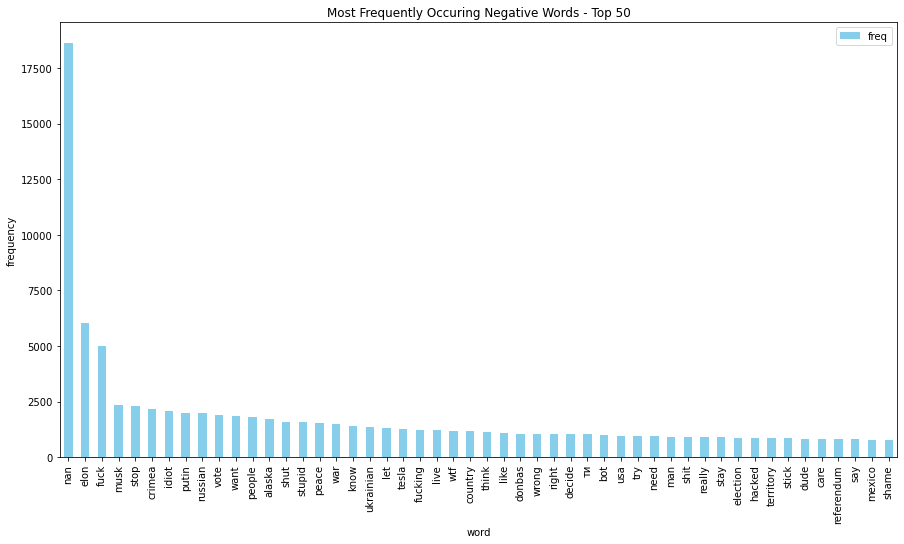

In [ ]:
neg_frequency = pd.DataFrame(neg_top50, columns=['word', 'freq'])
neg_frequency.head(50).plot(x = 'word', y = 'freq', kind = 'bar', figsize = (15, 8), color = 'skyblue')
plt.title("Most Frequently Occuring Negative Words - Top 50")
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()

### Identify factors/reasons for postive tweets.


In [ ]:
pos_musktweets = musktweets.loc[musktweets['prediction_by_xgb'] == 1]

In [ ]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['russiawar',
 'ukrainewar','russia','ukraine'
 ])

In [ ]:
#instantiate CountVectorizer() 
cv=CountVectorizer(stop_words=my_stop_words) 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(pos_musktweets['detokenized'].apply(lambda x: np.str_(x)))

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
# count matrix 
count_vector=cv.transform(pos_musktweets['detokenized'].apply(lambda x: np.str_(x)))
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [ ]:
docs=pos_musktweets['detokenized'].tolist()

In [ ]:
results=[]
for i in range(tf_idf_vector.shape[0]):
    
    # get vector for a single document
    curr_vector=tf_idf_vector[i]
    
    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo_matrix(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_features(feature_names,sorted_items,3)
    
    
    results.append(keywords)

df=pd.DataFrame(zip(docs,results),columns=['doc','keywords'])
df


,doc,keywords
0,truly foolish elon life experience taught bett...,"{'deemed': 0.385, 'exterminio': 0.373, 'boltac..."
1,think good idea musk hasits funny ukrain preid...,"{'ecological': 0.392, 'differs': 0.392, 'bütün..."
2,elon ive defended yr cuz believe u mean well b...,"{'credi': 0.308, 'beyinsiz': 0.308, 'abolosh':..."
3,russia hopefully weakened point never commit a...,"{'carboy': 0.482, 'attentionhungry': 0.313, 'f..."
4,hunter biden laptop scandal ready explode mult...,"{'cashing': 0.607, 'abstracting': 0.3, 'gallia..."
...,...,...
48679,majority support ukraine fled due conflict loo...,"{'anecdotal': 0.46, '80bitcoinbc1qdlnwxm8h578u..."
48680,suggesting sound bit like good friday agreemen...,"{'bossing': 0.395, '2007': 0.354, 'evitemos': ..."
48681,let vote much garden annex vote friend family,"{'bravadological': 0.578, 'fucked': 0.459, '37..."
48682,already vote soviet union broke method creatin...,"{'binks': 0.531, 'corsicans': 0.325, 'anytical..."


In [ ]:
keyword_list_dic = df['keywords'].to_list()
keyword_list = []

for n in range(len(keyword_list_dic)):
  keyword_list.append([*keyword_list_dic[n]])
flat_keyword_list = list(np.concatenate(keyword_list))
counts = Counter(flat_keyword_list)
pos_top50 = counts.most_common(50)
pos_top50

[('geoscale', 1350),
 ('bub', 580),
 ('croire', 470),
 ('croesus', 470),
 ('absolute', 467),
 ('appear', 461),
 ('excellence', 448),
 ('bashar', 397),
 ('garantir', 376),
 ('fairbalanced', 362),
 ('conference', 362),
 ('fucked', 283),
 ('fairey', 281),
 ('geleckt', 279),
 ('abrussian', 279),
 ('demsrinos', 278),
 ('brûlent', 272),
 ('crimingfailed', 245),
 ('antimissiles', 226),
 ('bulletproof', 223),
 ('cattolica', 216),
 ('czar', 207),
 ('fuj', 207),
 ('distributing', 202),
 ('carbon', 202),
 ('comparisions', 201),
 ('comrade', 197),
 ('civiliansfor', 195),
 ('3060', 189),
 ('270k', 186),
 ('foyle', 184),
 ('factbased', 182),
 ('eavesdrop', 181),
 ('barier', 177),
 ('cosmodrome', 174),
 ('fuf', 170),
 ('cubainthestreet', 164),
 ('bordes', 158),
 ('flashback', 155),
 ('fampck', 155),
 ('danube', 152),
 ('geenius', 145),
 ('busy', 145),
 ('emiciler', 143),
 ('adaptadas', 142),
 ('aparthaids', 141),
 ('familywould', 139),
 ('completebuffoon', 138),
 ('finanzierung', 137),
 ('ahem', 134)

**# P4 Visualization**

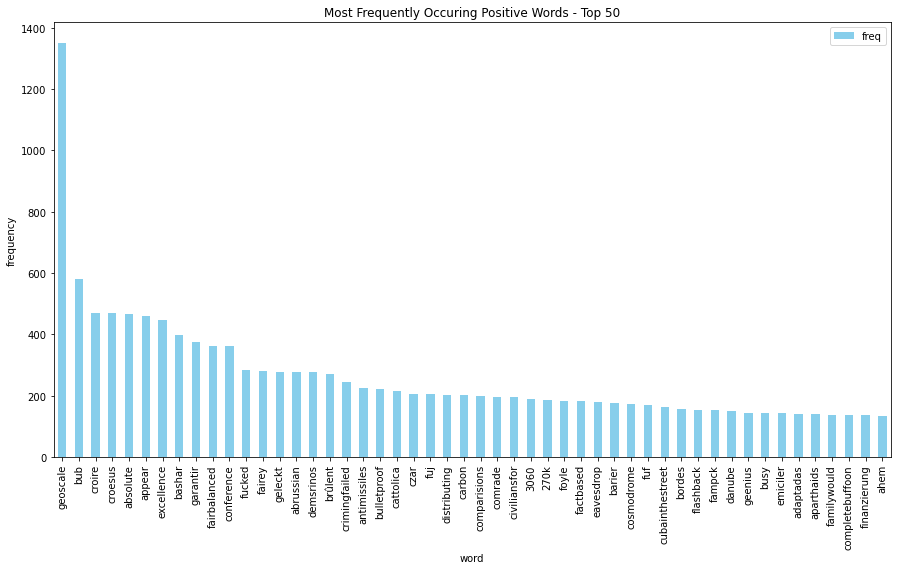

In [ ]:
import matplotlib.pyplot as plt
pos_frequency = pd.DataFrame(pos_top50, columns=['word', 'freq'])
pos_frequency.head(50).plot(x = 'word', y = 'freq', kind = 'bar', figsize = (15, 8), color = 'skyblue')
plt.title("Most Frequently Occuring Positive Words - Top 50")
plt.xlabel('word')
plt.ylabel('frequency')
plt.show()